# Match Variance Analysis

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chess_match as cm

In [279]:
data_folder = './data/'

# WL 2018
#match_name = 'WL2018_ARG_CAN'
#match_name = 'WL2018_ARG_ENG'
#match_name = 'WL2018_ARG_RUS'
#match_name = 'WL2018_ARG_SRB'
#match_name = 'WL2018_ARG_UKR'

# PAN 2018
#match_name = 'PAN2018_ARG_CAN'

# WL 2019
#match_name = 'WL2019_ARG_RUS'
match_name = 'WL2019_ARG_SRB'


In [280]:
M_xlsx = pd.read_excel(data_folder+match_name+'.xlsx', index_col=None, header=None)

M = M_xlsx.values
#print(M)

## Default analysis

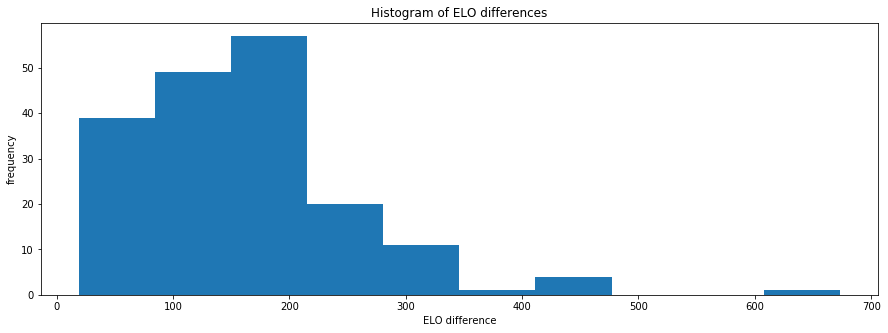

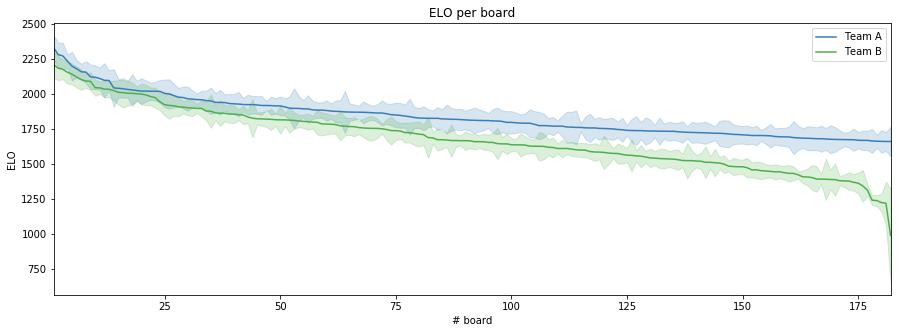

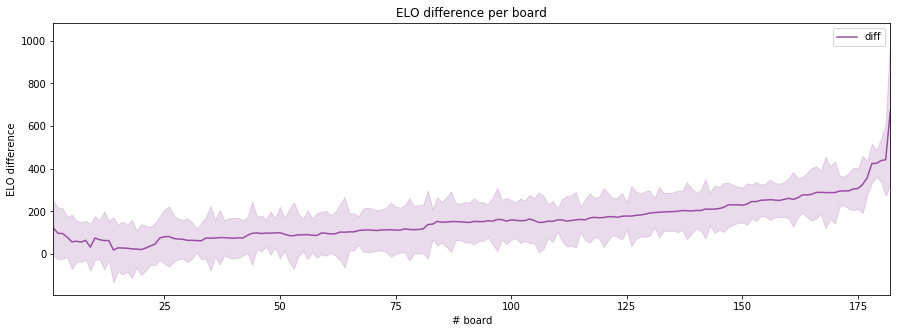

In [281]:
cm.plot_match_elo_diff_hist(M, match_name=match_name)
cm.plot_match_elos(M, match_name=match_name)
cm.plot_match_elo_diff(M, match_name=match_name)

## Variance over Team A ELOs

In [282]:
N = 400 # trials per match simulation

S = 21 # elo_var_steps
elo_var_min = -50.0
elo_var_max = 100.0

In [283]:
elo_var_vec = np.linspace(elo_var_min, elo_var_max, num=S)

M_scores = np.empty([S,N,4])

for s in range(S):
    M_aux = np.copy(M)
    M_aux[:,0] = M[:,0] + elo_var_vec[s]

    for n in range(N):
        M_results = cm.match_results(M_aux)

        A_score = np.sum(M_results[:,0])
        B_score = np.sum(M_results[:,1])
        Dif_score = A_score - B_score
        w_d_l = 1 if Dif_score > 0 else -1 if Dif_score < 0 else 0


        M_scores[s,n] = [A_score, B_score, Dif_score, w_d_l]

In [284]:
A_score_means = np.mean(M_scores[:,:,0], axis=1)
B_score_means = np.mean(M_scores[:,:,1], axis=1)
A_score_stds = np.std(M_scores[:,:,0], axis=1)
B_score_stds = np.std(M_scores[:,:,1], axis=1)

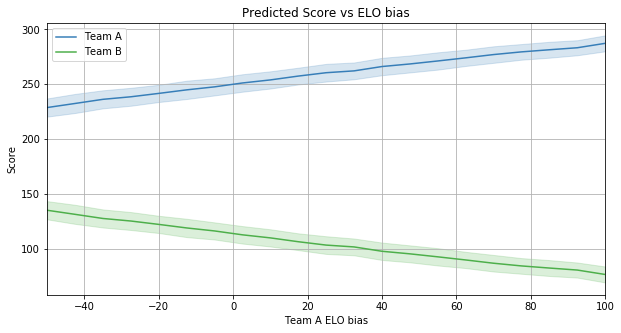

In [285]:
cmap = plt.get_cmap('Set1')
cmap_A = cmap(1)
cmap_B = cmap(2)

plt.figure(figsize=(10,5))
plt.plot(elo_var_vec, A_score_means, color=cmap_A, label='Team A')
plt.plot(elo_var_vec, B_score_means, color=cmap_B, label='Team B')
plt.fill_between(elo_var_vec, A_score_means - A_score_stds, A_score_means + A_score_stds, color=cmap_A, alpha=0.2)
plt.fill_between(elo_var_vec, B_score_means - B_score_stds, B_score_means + B_score_stds, color=cmap_B, alpha=0.2)
plt.title('Predicted Score vs ELO bias')
plt.xlabel('Team A ELO bias')
plt.ylabel('Score')
plt.xlim([elo_var_min, elo_var_max])
plt.legend()
plt.grid()
plt.savefig('./outputs/'+match_name+'_score_elo_bias.png')
plt.show()

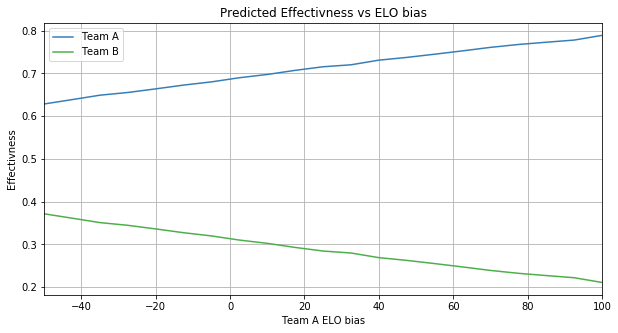

In [286]:
cmap = plt.get_cmap('Set1')
cmap_A = cmap(1)
cmap_B = cmap(2)

plt.figure(figsize=(10,5))
plt.plot(elo_var_vec, A_score_means/(A_score_means+B_score_means), color=cmap_A, label='Team A')
plt.plot(elo_var_vec, B_score_means/(A_score_means+B_score_means), color=cmap_B, label='Team B')

plt.title('Predicted Effectivness vs ELO bias')
plt.xlabel('Team A ELO bias')
plt.ylabel('Effectivness')
plt.xlim([elo_var_min, elo_var_max])
plt.legend()
plt.grid()
plt.savefig('./outputs/'+match_name+'_effec_elo_bias.png')
plt.show()

In [287]:
M_scores[7,:,3]
lose_vec = np.sum(M_scores[:,:,3]<0, axis=1)
draw_vec = np.sum(M_scores[:,:,3]==0, axis=1)
win_vec = np.sum(M_scores[:,:,3]>0, axis=1)
N_boards = M_scores.shape[1]

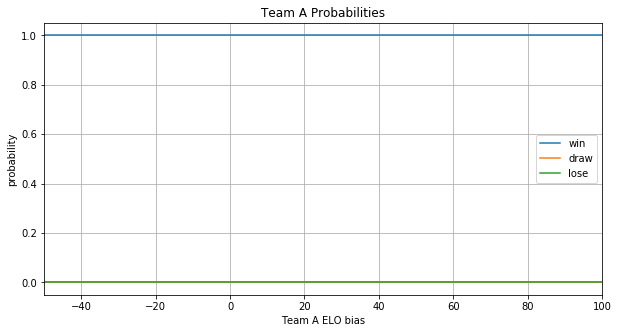

In [288]:
plt.figure(figsize=(10,5))
plt.plot(elo_var_vec, win_vec/N_boards, label='win')
plt.plot(elo_var_vec, draw_vec/N_boards, label='draw')
plt.plot(elo_var_vec, lose_vec/N_boards, label='lose')
plt.title('Team A Probabilities')
plt.xlabel('Team A ELO bias')
plt.ylabel('probability')
plt.xlim([elo_var_min, elo_var_max])
plt.legend()
plt.grid()
plt.savefig('./outputs/'+match_name+'_prob_elo_bias.png')
plt.show()

## Show Biased Analysis

In [289]:
Team_A_bias = 30

In [290]:
M_biased = np.copy(M)
M_biased[:,0] = M[:,0] + Team_A_bias

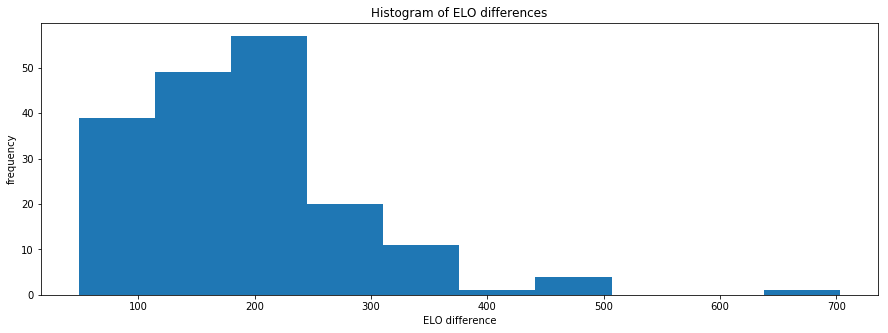

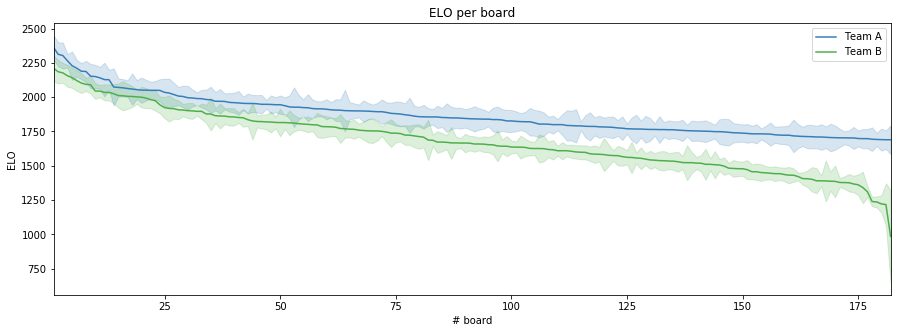

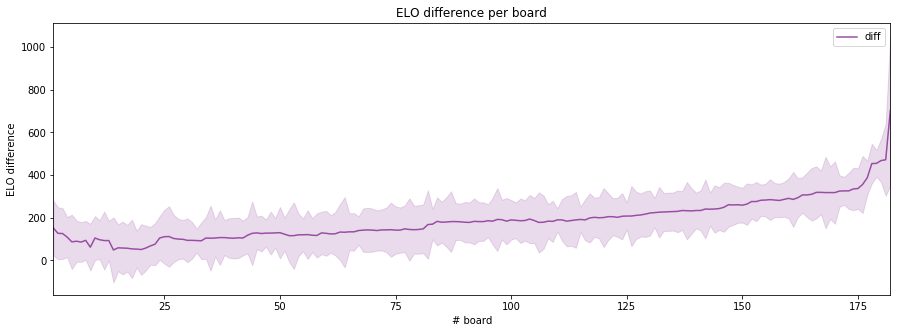

In [291]:
cm.plot_match_elo_diff_hist(M_biased, match_name=match_name+'biased', savefig=False)
cm.plot_match_elos(M_biased, match_name=match_name+'biased', savefig=False)
cm.plot_match_elo_diff(M_biased, match_name=match_name+'biased', savefig=False)

## Biased Match simulation

In [292]:
N = 1000

In [293]:
M_scores = np.empty([N,4])

for n in range(N):
    M_results = cm.match_results(M_biased)
    
    A_score = np.sum(M_results[:,0])
    B_score = np.sum(M_results[:,1])
    Dif_score = A_score - B_score
    w_d_l = 1 if Dif_score > 0 else -1 if Dif_score < 0 else 0
    
    
    M_scores[n] = [A_score, B_score, Dif_score, w_d_l]
    
#print(M_scores)

In [294]:
A_score_mean = np.mean(M_scores[:,0])
B_score_mean = np.mean(M_scores[:,1])
A_score_std = np.std(M_scores[:,0])
B_score_std = np.std(M_scores[:,1])

### Plotting results

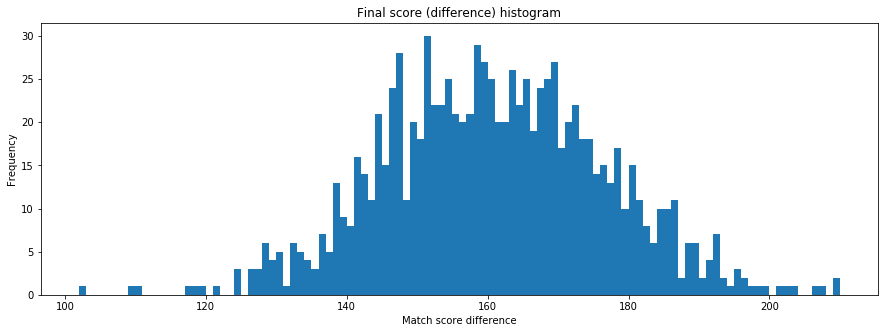

In [295]:
plt.figure(figsize=[15,5])
plt.hist(M_scores[:,2], bins=np.arange(np.min(M_scores[:,2]),np.max(M_scores[:,2])+1), density=False)
plt.title('Final score (difference) histogram')
plt.xlabel('Match score difference')
plt.ylabel('Frequency')
plt.savefig('./outputs/'+match_name+'_final_score_hist_biased.png')
plt.show()

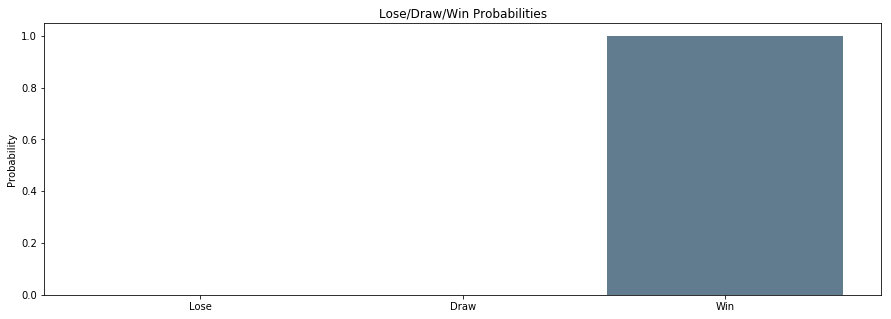

Team A:
	Win chances = 100.00 %
	Draw chances = 0.00 %
	Lose chances = 0.00 %


In [296]:
plt.figure(figsize=[15,5])
p_res, bins, patches = plt.hist(M_scores[:,3], bins=[-1,0,1,2], density=True, rwidth=0.9, color='#607c8e')
plt.title('Lose/Draw/Win Probabilities')
plt.xticks(np.arange(3)-0.5, ('Lose', 'Draw', 'Win',))
plt.ylabel('Probability')
plt.savefig('./outputs/'+match_name+'_LDW_probs_biased.png')
plt.show()
#print(p_res)

print('Team A:')
print('\tWin chances = {:0.2f} %'.format(p_res[2]*100))
print('\tDraw chances = {:0.2f} %'.format(p_res[1]*100))
print('\tLose chances = {:0.2f} %'.format(p_res[0]*100))

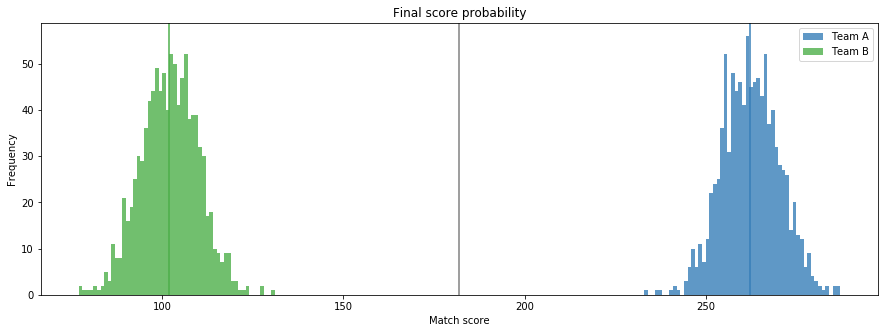

Expected final score = 262.19 (±7.89) - 101.81 (±7.89)
Expected effectiveness = 72.03 % - 27.97 %


In [297]:
cmap = plt.get_cmap('Set1')
cmap_A = cmap(1)
cmap_B = cmap(2)

plt.figure(figsize=[15,5])
plt.hist(M_scores[:,0], bins=np.arange(np.min(M_scores[:,0]),np.max(M_scores[:,0])+1), 
         density=False, label='Team A', color=cmap_A, alpha=0.8)
plt.hist(M_scores[:,1], bins=np.arange(np.min(M_scores[:,1]),np.max(M_scores[:,1])+1), 
         density=False, label='Team B', color=cmap_B, alpha=0.8)

plt.axvline(x=np.mean(M_scores[:,0]), color=cmap_A)
plt.axvline(x=np.mean(M_scores[:,1]), color=cmap_B)
plt.axvline(x=M.shape[0], color='grey')

plt.legend()
plt.title('Final score probability')
plt.xlabel('Match score')
plt.ylabel('Frequency')
plt.savefig('./outputs/'+match_name+'_final_score_prob_biased.png')
plt.show()

print(r'Expected final score = {:0.2f} (±{:0.2f}) - {:0.2f} (±{:0.2f})'.format(A_score_mean, A_score_std, B_score_mean, B_score_std))
print(r'Expected effectiveness = {:0.2f} % - {:0.2f} %'.format(100*A_score_mean/(A_score_mean + B_score_mean), 100*B_score_mean/(A_score_mean + B_score_mean)))
      